In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_df = pd.read_csv('house_price.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47,70,71,72,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
house_df = pd.read_csv('assets/updated_house_df.csv')
#house_df["deed_date"] = pd.to_datetime(house_df["deed_date"])
#house_df["year"] = house_df["deed_date"].dt.year

In [4]:
house_df.shape

(259024, 34)

In [5]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all'],
      dtype='object')

In [6]:
house_df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,bath_fixtures,physical_zip_code,physical_city,...,demand,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,1.5,0,27603,raleigh,...,120.5,NaN,NaN,2000,2049,1,0,0,0,0
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,2.0,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,2.5,0,27607,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,2.0,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,1.5,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1


In [7]:
house_df[house_df['bath'] == 'J']

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,bath_fixtures,physical_zip_code,physical_city,...,demand,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all


In [8]:
house_df.shape

(259024, 34)

In [9]:
house_df.tail(3).T

,259021,259022,259023
deed_date,2021-12-01,2021-12-01,2021-05-01
land_sale_price,0.0,0.0,0.0
total_sale_price,430000.0,200300.0,170000.0
assessed_building_value,322050.0,65465.0,119201.0
story_height,2.0,1.0,1.0
heated_area,1479,2407,896
bath,2.5,2.0,1.0
bath_fixtures,0,3,0
physical_zip_code,27610,27601,27529
physical_city,raleigh,raleigh,garner


In [10]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all'],
      dtype='object')

In [11]:
house_df['is_covid'] = 0
house_df.loc[(house_df['covid_cases'] > 0), 'is_covid'] = 1
house_df['is_covid'].value_counts()

0    203238
1     55786
Name: is_covid, dtype: int64

## summary stats and distribution

### land_sale_price

<AxesSubplot:>

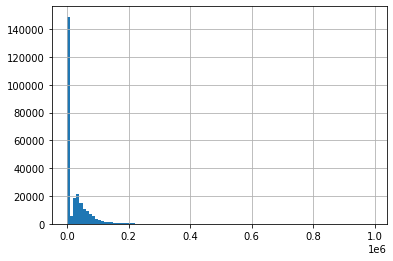

In [12]:
house_df.land_sale_price.hist(bins=np.arange(0,1e6,1e4))

In [13]:
house_df.land_sale_price.value_counts()

0.0         148605
30000.0       1894
45000.0       1790
40000.0       1714
35000.0       1628
             ...  
423700.0         1
444100.0         1
78726.0          1
11700.0          1
47100.0          1
Name: land_sale_price, Length: 3581, dtype: int64

<AxesSubplot:>

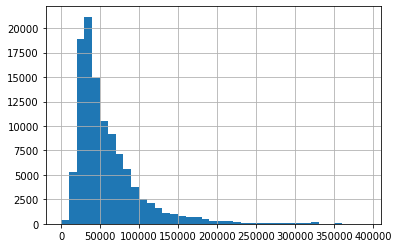

In [14]:
lsp = house_df.land_sale_price
lsp = lsp[lsp != 0]
lsp.hist(bins=np.arange(0,4e5,1e4))

roughly lognormal distributed

<AxesSubplot:>

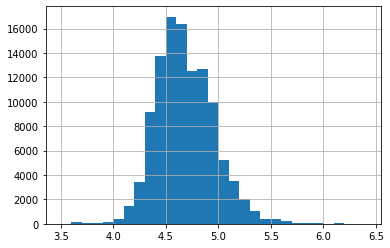

In [15]:
np.log10(lsp).hist(bins=np.arange(3.5,6.5,0.1))

In [16]:
np.round(lsp.describe())

count     110419.0
mean       61520.0
std        76448.0
min          190.0
25%        31000.0
50%        45000.0
75%        72500.0
max      5538500.0
Name: land_sale_price, dtype: float64

### total_sale_price

this is what we are going to predict

<AxesSubplot:>

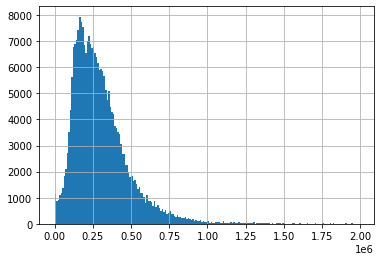

In [17]:
house_df.total_sale_price.hist(bins=np.arange(0,2e6,1e4))

In [18]:
house_df.total_sale_price.value_counts().sort_index()

5.0             1
313.0          16
315.0           1
500.0         124
1000.0         99
             ... 
24125000.0     26
24306400.0     17
25783000.0     22
47925000.0      3
70600000.0     18
Name: total_sale_price, Length: 3653, dtype: int64

In [19]:
tsp = house_df.total_sale_price
print(np.percentile(tsp, range(0,10)))
print(np.percentile(tsp, range(90,101)))

[5.00e+00 2.55e+04 4.90e+04 6.60e+04 7.90e+04 8.85e+04 9.60e+04 1.03e+05
 1.09e+05 1.14e+05]
[  530000.   550000.   570000.   595000.   621500.   651000.   693000.
   749500.   825000.   995000. 70600000.]


In [20]:
print(np.percentile(tsp, np.arange(0,3.1,0.2)))
print(np.percentile(tsp, np.arange(99,100.1,0.1)))

[5.0000e+00 3.0000e+03 8.0000e+03 1.5000e+04 2.0000e+04 2.5500e+04
 3.0806e+04 3.5500e+04 4.0000e+04 4.5000e+04 4.9000e+04 5.3000e+04
 5.6500e+04 6.0000e+04 6.3000e+04 6.6000e+04]
[  995000.          1034000.          1079907.99999998  1129000.
  1200000.          1262442.49999996  1350000.          1500000.
  1787921.7999998   2649424.9999967  70600000.        ]


<AxesSubplot:>

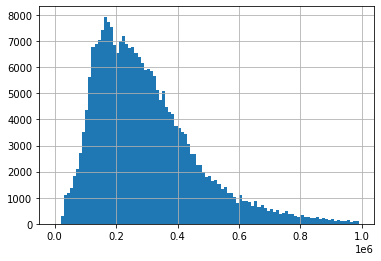

In [21]:
l, r = np.percentile(tsp, [1, 99.5])
tsp = tsp[(tsp > l) & (tsp < r)]
tsp.hist(bins=np.arange(0,1e6,1e4))

In [22]:
# clean 1.5% outliers
house_df = house_df[(house_df["total_sale_price"] > l) &
                    (house_df["total_sale_price"] < r)]
# create log house px
house_df["log_px"] = np.log10(house_df["total_sale_price"])

somewhere between normal and lognormal

<AxesSubplot:>

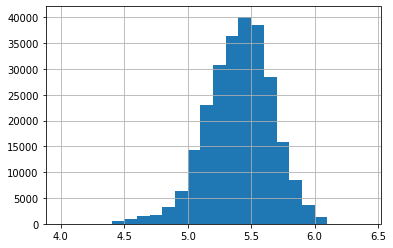

In [23]:
np.log10(tsp).hist(bins=np.arange(4,6.5,0.1))

In [24]:
# note this is after dropping 2% outliers
np.round(tsp.describe())

count     255108.0
mean      300363.0
std       174210.0
min        25800.0
25%       174000.0
50%       265000.0
75%       382500.0
max      1262000.0
Name: total_sale_price, dtype: float64

<AxesSubplot:xlabel='year'>

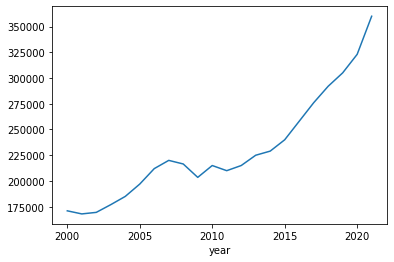

In [25]:
# see trend
house_df.groupby("year")["total_sale_price"].median().plot()

In [26]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px'],
      dtype='object')

<AxesSubplot:xlabel='year'>

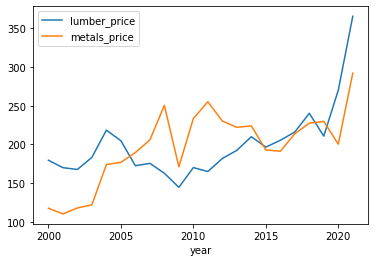

In [27]:
house_df[["lumber_price","metals_price","year"]].drop_duplicates(["year"]).set_index("year").sort_index().plot()

<AxesSubplot:xlabel='year'>

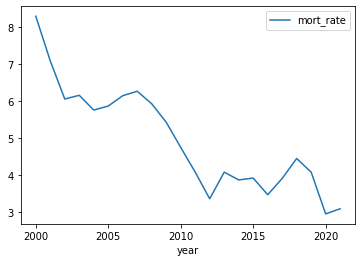

In [28]:
house_df[["mort_rate","year"]].drop_duplicates(["year"]).set_index("year").sort_index().plot()

<AxesSubplot:xlabel='year'>

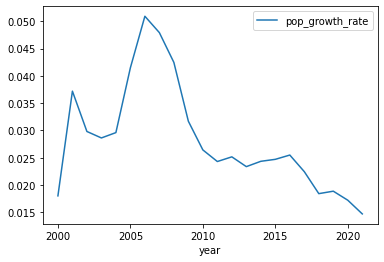

In [29]:
house_df[["pop_growth_rate","year"]].drop_duplicates(["year"]).set_index("year").sort_index().plot()

### deed_date

<AxesSubplot:>

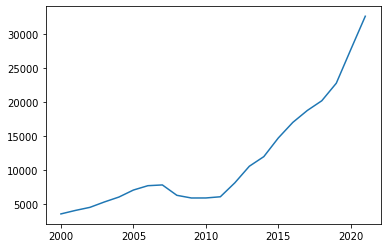

In [30]:
# seeing some trend changes
house_df["year"].value_counts().sort_index().plot()

### assessed_building_value

<AxesSubplot:>

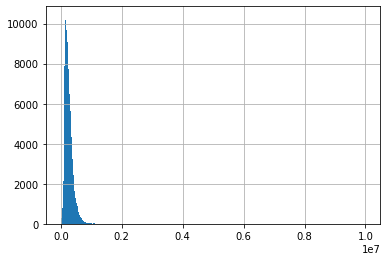

In [31]:
house_df.assessed_building_value.hist(bins=np.arange(0,1e7,1e4))

In [32]:
np.round(house_df.assessed_building_value.describe())

count      255108.0
mean       260276.0
std        157082.0
min             0.0
25%        164511.0
50%        231002.0
75%        322801.0
max      18296504.0
Name: assessed_building_value, dtype: float64

### story_height

In [33]:
house_df.story_height.value_counts()

2.00    123371
1.00     73158
1.50     18593
1.75     17352
1.88     11331
1.63      6238
1.40      3906
3.00      1148
2.50         6
2.40         3
2.63         1
2.75         1
Name: story_height, dtype: int64

The numeric value for story height does not have linear relationship with price

Non-integer story heights of 1.4, 1.5, 1.63, etc. may correspond to multiple levels, hence better price than 2 story.
We need to investigate more the usefulness of this feature.

<AxesSubplot:xlabel='story_height'>

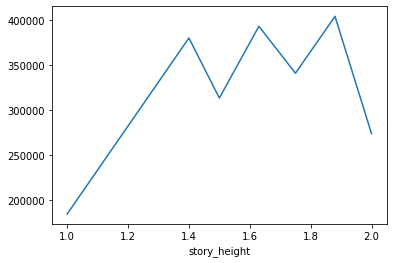

In [34]:
house_df[(house_df["story_height"] <= 2)].groupby("story_height")["total_sale_price"].median().sort_index().plot()

<AxesSubplot:>

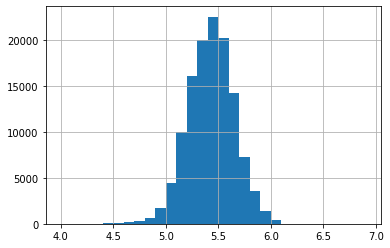

In [35]:
np.log10(house_df[(house_df["story_height"] == 2)]["total_sale_price"]).hist(bins=np.arange(4,7,0.1))

<AxesSubplot:>

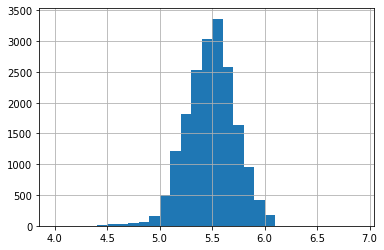

In [36]:
np.log10(house_df[(house_df["story_height"] == 1.5)]["total_sale_price"]).hist(bins=np.arange(4,7,0.1))

<AxesSubplot:>

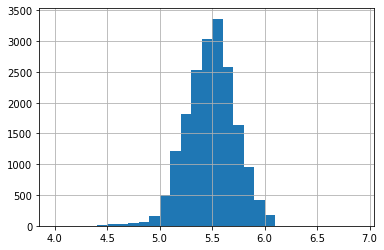

In [37]:
np.log10(house_df[(house_df["story_height"] == 1.5)]["total_sale_price"]).hist(bins=np.arange(4,7,0.1))

story_height
1.50    AxesSubplot(0.125,0.125;0.775x0.755)
1.75    AxesSubplot(0.125,0.125;0.775x0.755)
1.88    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_sale_price, dtype: object

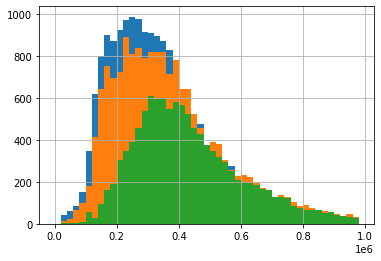

In [38]:
house_df[(house_df["story_height"].isin([1.5,1.75,1.88]))].groupby("story_height")\
    ["total_sale_price"].hist(bins=np.arange(0,1e6,2e4))

story_height
1.4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_sale_price, dtype: object

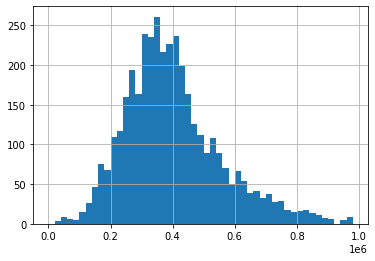

In [39]:
house_df[(house_df["story_height"].isin([1.4]))].groupby("story_height")\
    ["total_sale_price"].hist(bins=np.arange(0,1e6,2e4))

<AxesSubplot:xlabel='story_height'>

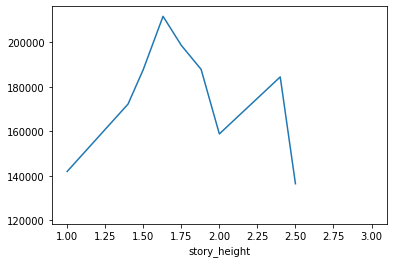

In [40]:
house_df[(house_df["story_height"] <= 3)].groupby("story_height")["total_sale_price"].std().sort_index().plot()

<AxesSubplot:xlabel='story_height'>

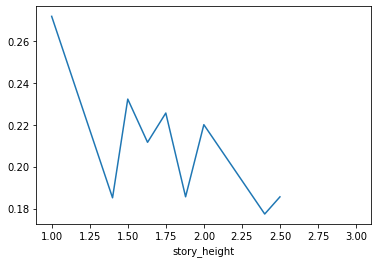

In [41]:
house_df[(house_df["story_height"] <= 3)].groupby("story_height")["log_px"].std().sort_index().plot()

### bath

In [42]:
house_df.bath.value_counts()

2.5    110431
3.5     51216
2.0     45268
3.0     25838
1.5     10724
1.0     10593
0.0       626
4.0       412
Name: bath, dtype: int64

In [43]:
# create two features "bath_unknown" for bath==0, and "bath" for bath >= 0
# "bath_unknown" includes "adequate, no plumbing, limited plumbing, no of fixtures"
print(house_df.bath.value_counts().sort_index())
house_df["bath_unknown"] = 0
house_df.loc[(house_df["bath"] == 0), "bath_unknown"] = 1

0.0       626
1.0     10593
1.5     10724
2.0     45268
2.5    110431
3.0     25838
3.5     51216
4.0       412
Name: bath, dtype: int64


In [44]:
house_df.bath_unknown.value_counts()

0    254482
1       626
Name: bath_unknown, dtype: int64

<AxesSubplot:xlabel='bath'>

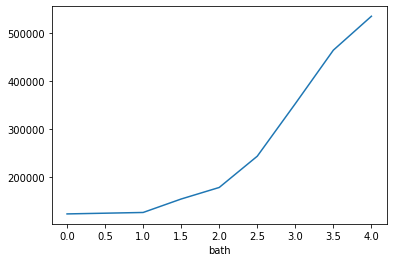

In [45]:
# from the avg price we see "bath_unknown"s' median is somewhere between 1 - 3.5 baths
# so it should not be treated as 0 baths.
house_df.groupby("bath")["total_sale_price"].median().plot()

<AxesSubplot:xlabel='bath'>

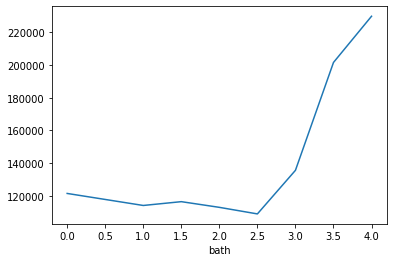

In [46]:
house_df.groupby("bath")["total_sale_price"].std().plot()

<AxesSubplot:xlabel='bath'>

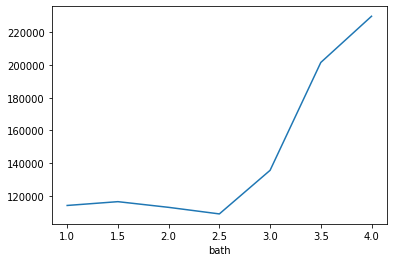

In [47]:
house_df[(house_df["bath"] >= 1)].groupby("bath")["total_sale_price"].std().plot()

In [48]:
house_df['log_px'] = np.log10(house_df["total_sale_price"])

<AxesSubplot:>

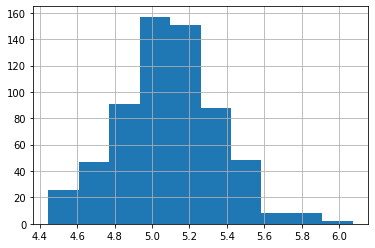

In [49]:
house_df[(house_df['bath'] == 0)]['log_px'].hist()

<AxesSubplot:>

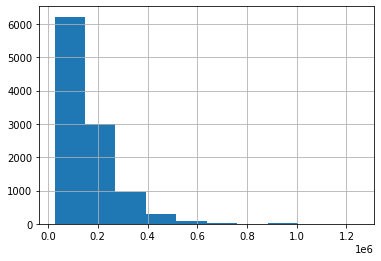

In [50]:
house_df[(house_df["bath"]==1)]["total_sale_price"].hist()#bins=np.arange())

In [51]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px',
       'bath_unknown'],
      dtype='object')

### physical_zip_code

In [52]:
print(house_df["physical_zip_code"].value_counts())
house_df = house_df[(house_df["physical_zip_code"] != 0)]

27587    18380
27519    15969
27610    15164
27526    13961
27616    13687
27502    13102
27540    12490
27603    11161
27615    10705
27613    10413
27513    10252
27604    10171
27614     8881
27612     8361
27529     7707
27545     7450
27511     7239
27606     7094
27560     6770
27609     6641
27539     6473
27518     4746
27591     4637
27617     4319
27523     4229
27597     3586
27607     3501
27608     2925
27571     2509
27605     1305
27601     1280
Name: physical_zip_code, dtype: int64


In [53]:
# use 27587 as base case
house_df.groupby("physical_zip_code")["log_px"].describe().sort_values("std")

,count,mean,std,min,25%,50%,75%,max
physical_zip_code,,,,,,,,
27571,2509.0,5.475418,0.169018,4.414973,5.381115,5.494155,5.588832,6.068260
27616,13687.0,5.289872,0.180437,4.439333,5.167317,5.298853,5.417886,5.960709
27519,15969.0,5.576290,0.181137,4.447158,5.462398,5.577492,5.703291,6.100715
27560,6770.0,5.441918,0.181471,4.477121,5.315970,5.462398,5.563481,6.096910
27523,4229.0,5.620688,0.196942,4.439333,5.495544,5.628900,5.750508,6.100543
27518,4746.0,5.556608,0.197872,4.414973,5.451786,5.571126,5.681241,6.101059
27502,13102.0,5.485631,0.199550,4.431364,5.361728,5.501059,5.621695,6.097084
27526,13961.0,5.402173,0.200404,4.414973,5.290035,5.427324,5.537819,6.079181
27540,12490.0,5.489878,0.203415,4.414973,5.352183,5.509203,5.633468,6.091667


In [54]:
print(house_df["physical_city"].value_counts())

raleigh          115608
cary              38207
apex              23803
wake forest       18380
fuquay varina     13961
holly springs     12490
garner             7707
knightdale         7450
morrisville        6770
wendell            4637
zebulon            3586
rolesville         2509
Name: physical_city, dtype: int64


In [140]:
house_df[(house_df['total_sale_price']<1000000)]['total_sale_price'].mean()

296307.28430171404

## Regression

In [55]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px',
       'bath_unknown'],
      dtype='object')

In [108]:
# import statsmodels.api as sm
# yvar = "log_px"

# intercept = ["I"]
# macro = ["mort_rate", "lumber_price"]

# xvars = intercept + macro
# reg_df = house_df.copy()
# reg_df["I"] = 1
# reg_df = reg_df[(reg_df[[yvar]+xvars].notnull().all(axis=1))]

# model = sm.OLS(reg_df[yvar], reg_df[xvars]).fit()
# print(model.summary())

In [109]:
# import statsmodels.api as sm
# yvar = "log_px"

# reg_df = house_df.copy()

# intercept = ["I"]
# macro = ["mort_rate", "lumber_price"]
# #### story
# # base case is story==2, each of below variable represents difference to story==2
# story = ["I_story1", "I_story1-2", "I_story_other"]

# reg_df["I_story1"] = 0
# reg_df.loc[(reg_df["story_height"] == 1), "I_story1"] = 1

# reg_df["I_story1-2"] = 0
# reg_df.loc[(reg_df["story_height"] > 1) &
#            (reg_df["story_height"] < 2), "I_story1-2"] = 1

# reg_df["I_story_other"] = 0
# reg_df.loc[(reg_df["story_height"] > 2), "I_story_other"] = 1

# #### regression
# xvars = intercept + macro + story 

# reg_df["I"] = 1
# reg_df = reg_df[(reg_df[[yvar]+xvars].notnull().all(axis=1))]

# model = sm.OLS(reg_df[yvar], reg_df[xvars]).fit()
# print(model.summary())

In [146]:
#from statistics import LinearRegression
import statsmodels.api as sm
yvar = "log_px"

reg_df = house_df.copy()

intercept = ["I"]
macro = ["mort_rate", "lumber_price", "metals_price"]
#### story
# base case is story==2, each of below variable represents difference to story==2
story = ["I_story1", "I_story1-2", "I_story_other"]

reg_df["is_covid"] = 0
reg_df.loc[reg_df["covid_cases"] > 0, "is_covid"] = 1

reg_df["I_story1"] = 0
reg_df.loc[(reg_df["story_height"] == 1), "I_story1"] = 1

reg_df["I_story1-2"] = 0
reg_df.loc[(reg_df["story_height"] > 1) &
           (reg_df["story_height"] < 2), "I_story1-2"] = 1

reg_df["I_story_other"] = 0
reg_df.loc[(reg_df["story_height"] > 2), "I_story_other"] = 1

#### bath
bath = ["I_bath_unknown", "bath"]
reg_df["I_bath_unknown"] = 0
reg_df.loc[(reg_df["bath"] == 0), "I_bath_unknown"] = 1

#### heated area
reg_df["log_heated_area"] = np.log10(reg_df["heated_area"])


#### zip 27587 has the most number of the observations. so we set it as a benchmark.
all_zips = reg_df["physical_zip_code"].unique().tolist()
zip_vars = []
for z in all_zips:
    zip_var = f"I_zip{z}"
    zip_vars.append(zip_var)
    reg_df[zip_var] = 0
    reg_df.loc[(reg_df["physical_zip_code"] == z), zip_var] = 1
    
#### zip interaction with covid
zip_covid = []
for z in zip_vars:
    col = z + "_covid"
    zip_covid.append(col)
    reg_df[col] = reg_df[z] * reg_df["is_covid"]
    
zip_vars = [z for z in zip_vars if z != "I_27587"]
    
#### bath interaction with covid
#### The relative impact of covid to each zip code relative to 27587
reg_df["bath_covid"] = reg_df["bath"] * reg_df["is_covid"]
reg_df["I_story1_covid"] = reg_df["I_story1"] * reg_df["is_covid"]
reg_df["I_story1-2_covid"] = reg_df["I_story1-2"] * reg_df["is_covid"]
reg_df["I_story_other_covid"] = reg_df["I_story_other"] * reg_df["is_covid"]


#### regression
potential_xvars = intercept + macro + story + bath + ['gas', 'sewer', 'crime', 'log_heated_area'] +\
    ["bath_covid","I_story1_covid","I_story1-2_covid","I_story_other_covid"]+\
    ['is_covid'] + zip_vars + zip_covid

reg_df["I"] = 1
reg_df = reg_df[(reg_df[[yvar]+potential_xvars].notnull().all(axis=1))]

X, y = reg_df[potential_xvars], reg_df[yvar]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Demeaning
X_train["log_heated_area0"] = X_train["log_heated_area"] - X_train["log_heated_area"].mean()
X_train["mort_rate0"] = X_train["mort_rate"] - X_train["mort_rate"].mean()
X_train["bath0"] = X_train["bath"] - 2
X_train["bath0_covid"] = X_train["bath0"] * X_train["is_covid"]
X_train["lumber_price0"] = X_train["lumber_price"] - X_train["lumber_price"].mean()
X_train["metals_price0"] = X_train["metals_price"] - X_train["metals_price"].mean()

X_test["log_heated_area0"] = X_test["log_heated_area"] - X_train["log_heated_area"].mean()
X_test["mort_rate0"] = X_test["mort_rate"] - X_train["mort_rate"].mean()
X_test["bath0"] = X_test["bath"] - 2
X_test["bath0_covid"] = X_test["bath0"] * X_test["is_covid"]
X_test["lumber_price0"] = X_test["lumber_price"] - X_train["lumber_price"].mean()
X_test["metals_price0"] = X_test["metals_price"] - X_train["metals_price"].mean()

## X_train,X_test interaction
X_train["log_heated_area0_covid"] = X_train["is_covid"] * X_train["log_heated_area0"]
X_test["log_heated_area0_covid"] = X_test["is_covid"] * X_test["log_heated_area0"]

macro0 = [c + "0" for c in macro]
xvars = intercept + macro0 + story + ["bath0"] + ['gas', 'sewer', 'crime', 'log_heated_area0'] +\
    ["bath0_covid","log_heated_area0_covid","I_story1_covid","I_story1-2_covid","I_story_other_covid"]+\
    ['is_covid'] + zip_vars + zip_covid

X_train, X_test = X_train[xvars], X_test[xvars]

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

<ipython-input-146-83a9ce591e75>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["log_heated_area0"] = X_train["log_heated_area"] - X_train["log_heated_area"].mean()
<ipython-input-146-83a9ce591e75>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["mort_rate0"] = X_train["mort_rate"] - X_train["mort_rate"].mean()
<ipython-input-146-83a9ce591e75>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

                            OLS Regression Results                            
Dep. Variable:                 log_px   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     6135.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:22:56   Log-Likelihood:             1.1050e+05
No. Observations:              204086   AIC:                        -2.208e+05
Df Residuals:                  204008   BIC:                        -2.200e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
I                          5

In [127]:
10** 5.3842

242214.42285751208

In [131]:
10**-0.028 -1

-0.06243799307411979

In [134]:
10 **  0.0147 -1

0.034427362715672594

In [142]:
10 ** -0.0204 -1

-0.045886589718020176

In [143]:
10 ** 0.0438 -1 ##bath

0.1061142822180785

In [144]:
10 ** 0.0613 -1 ##covid

0.15159560831803431

In [128]:
(X_test[xvars].mean() * model.params[xvars]).sort_values()

sewer        -0.015451
I_zip27610   -0.006147
crime        -0.004157
I_zip27529   -0.002562
I_zip27616   -0.002492
                ...   
I_story1-2    0.007460
is_covid      0.010940
gas           0.013442
bath0         0.024317
I             5.359963
Length: 78, dtype: float64

<AxesSubplot:>

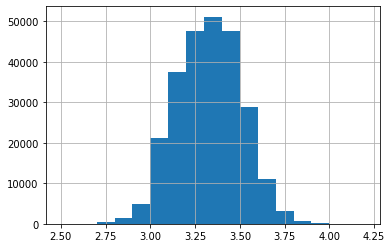

In [124]:
## after loged, the hist is more symmetric because our y var is symmetric. 
reg_df["log_heated_area"].hist(bins=np.arange(2.5,4.3,0.1))#.hist(bins=np.arange(0,10000,100))

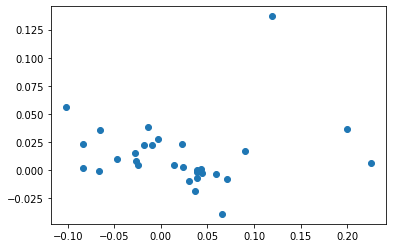

In [125]:
res = model.params[zip_vars].reset_index() # price by zip
res["zip_covid"] = model.params[zip_covid].values # price chg after covide by zip
res["zip"] = all_zips
res = res.drop("index", axis=1)

counts = reg_df.groupby("physical_zip_code").apply(len).reset_index()
counts.columns = ["zip", "cnts"]
res = pd.merge(res, counts, on="zip")
res = res[(res.cnts > 300)]

plt.scatter(res[0], res["zip_covid"])

In [71]:
res.sort_values(0)

,0,zip_covid,zip,cnts
7,-0.103602,0.064391,27610,15164
14,-0.083646,0.025862,27529,7707
8,-0.083079,0.005395,27597,3586
18,-0.066239,0.003069,27545,7450
10,-0.066168,0.040754,27591,4637
21,-0.046696,0.016176,27616,13687
0,-0.029852,0.024392,27604,10171
23,-0.026287,0.008705,27571,2509
16,-0.022815,0.005926,27526,13961
20,-0.019766,0.028397,27606,7094


In [105]:

#### regression
x_zip_covid = intercept + ["is_covid","mort_rate","lumber_price"] + zip_vars + zip_covid

reg_df["I"] = 1
reg_df = reg_df[(reg_df[[yvar]+x_zip_covid].notnull().all(axis=1))]
reg_df = reg_df[reg_df.year > 2013]

zip_covid_model = sm.OLS(reg_df[yvar], reg_df[x_zip_covid]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_px   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     353.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:50:17   Log-Likelihood:                 16446.
No. Observations:               83071   AIC:                        -3.277e+04
Df Residuals:                   83009   BIC:                        -3.219e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
I                    5.5223      0.004  

In [106]:
model.resid.std()

0.1985114084940489

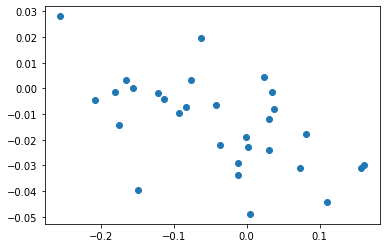

In [107]:
res = zip_covid_model.params[zip_vars].reset_index() # price by zip
res["zip_covid"] = zip_covid_model.params[zip_covid].values # price chg after covide by zip
res["zip"] = all_zips
res = res.drop("index", axis=1)

counts = reg_df.groupby("physical_zip_code").apply(len).reset_index()
counts.columns = ["zip", "cnts"]
res = pd.merge(res, counts, on="zip")
res = res[(res.cnts > 300)]

plt.scatter(res[0], res["zip_covid"])

## Random Forest

In [147]:
# random forest using same data

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [148]:
rf_reg.score(X_test, y_test)

0.7236022780188431

In [78]:
# import shap
# explainer = shap.TreeExplainer(rf_reg)
# shap_values = explainer.shap_values(X_test)


In [79]:
# shap.summary_plot(shap_values, X_test, plot_type="bar")

In [149]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08562835880775399
Mean Squared Error: 0.018168249416041803
Root Mean Squared Error: 0.13478964877186156


In [150]:
pd.Series(rf_reg.feature_importances_, index=xvars).sort_values(ascending=False)

log_heated_area0          0.628193
lumber_price0             0.059398
mort_rate0                0.052387
metals_price0             0.039531
log_heated_area0_covid    0.037980
                            ...   
I_zip27560_covid          0.000155
I_story_other_covid       0.000121
I_zip27617_covid          0.000099
I_zip27571_covid          0.000070
I                         0.000000
Length: 80, dtype: float64

<AxesSubplot:>

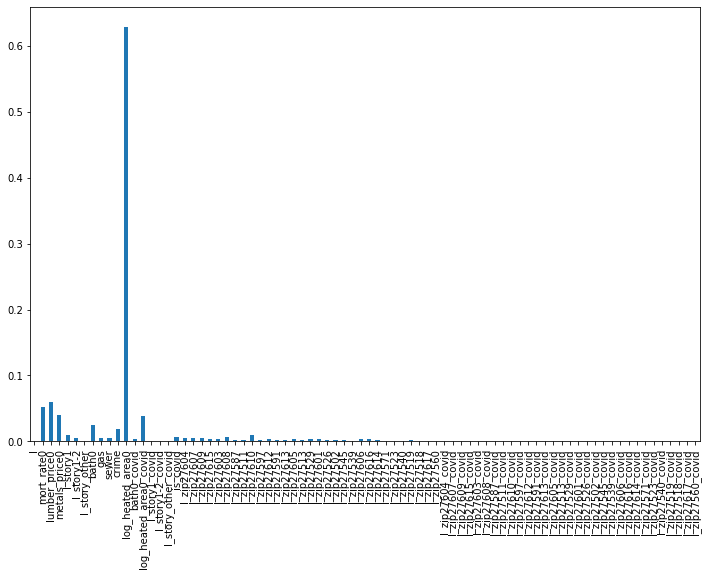

In [152]:
pd.Series(rf_reg.feature_importances_, index=xvars).plot.bar(figsize=[12,8])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dr_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
dr_score = dr_reg.score(X_test, y_test)
predict_dr = dr_reg.predict(X_test)
expl_dr = explained_variance_score(predict_dr, y_test)
print(dr_score, expl_dr)

0.48754443473688414 0.5020743240487482
